<h4>You can you any dataset where it makes sense to see how much is happening per certain time period. Especially if a dataset provides epoch, so not only days but hours, minutes and seconds.</h4>
<h4>I used news articles for this ( <a href="https://www.kaggle.com/therohk/million-headlines">kagge abc-headlines</a> for this example )</h4>
<h4>requirements are <strong>pandas, numpy, matplotlib and seaborn</strong></h4>

In [1]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

pd.set_option('display.max_colwidth', None)

In [2]:
def get_attr(tmp_df, col, tmp_str):
    return operator.attrgetter(tmp_str)(tmp_df[col])

def get_matrix(tmp_dff, date_col, groupy, groupx, fill=np.NaN, freq='d'):
    ### THIS FUNCTION IS SO FUCCKING CLUMSY ESCPECIALLY rename() IT NEEDS A REWORK BUT IT WORKS!!!!!!!
    tmp_df = tmp_dff.copy()
    date_df = pd.DataFrame(pd.date_range(start=startdate, end=enddate, freq=freq), columns={date_col})
    
    def rename(tmp_str):
        boolean = False
        tmp_l = list()
        if tmp_str == 'dt.dayofweek':
            tmp_l = pd.Series(list(calendar.day_name))
            boolean = True
        elif tmp_str == 'dt.month':
            tmp_l = pd.Series(list(calendar.month_name))
            boolean = True
        return (boolean, tmp_l)
        
    # create 2 new columns per group week with get_attr from strings (woa super fancy, actually i dont know maybe there is an even better possibility)
    tmp_df[groupy] = get_attr(tmp_df, date_col, groupy)
    tmp_df[groupx] = get_attr(tmp_df, date_col, groupx)
    
    # do the actual grouping and unstack it
    tmp_df = tmp_df.groupby([groupy,groupx]).size().unstack()

    # reindex both dimensions so empty values (like to publications on weekend) still are displayed (fill = custom fill_value)
    tmp_df = tmp_df.reindex(get_attr(date_df, date_col, groupy + ".sort_values")().unique())
    tmp_df = tmp_df.reindex(columns=(get_attr(date_df, date_col, groupx + ".sort_values")().unique()))
    
    # rename some shit
    tmp_df.index.name = groupy.split(".")[-1]
    tmp_df.columns.name = groupx.split(".")[-1]
    
    # rename some more (if dimensions are dayofweeks or months give them names)
    if (rename(groupy)[0]): tmp_df.index = tmp_df.index.map(rename(groupy)[1])
    if (rename(groupx)[0]): tmp_df.columns = tmp_df.columns.map(rename(groupx)[1])

    # fill all empty falues with custom fill value
    tmp_df = tmp_df.fillna(fill)
    return tmp_df

def heatmap(tmp_matrix, text=False, center = None, size=(10,5)):
    # finally plot the shit out of it
    plt.figure(figsize=size)
    sns.heatmap(tmp_matrix, cmap ='coolwarm', linewidths = 0.5, annot = text, fmt='.0f', center=center)

<h2>get_matrix</h2>
<table>
<tbody>
<tr>
<td><strong>Parameter</strong></td>
<td><strong>What is stands for<br /></strong></td>
</tr>
<tr>
<td>tmp_dff</td>
<td>the dataframe</td>
</tr>
<tr>
<td>date_col</td>
<td>the column in which are the dates</td>
</tr>
<tr>
<td>groupy</td>
<td>the y based dimension to group by</td>
</tr>
<tr>
<td>groupx</td>
<td>the x based dimension to group by</td>
</tr>
<tr>
<td>fill</td>
<td>if there are no news per unit then they will get filled by this (I like NaN for this, you could also use 0)</td>
</tr>
<tr>
<td>freq</td>
<td>depends on your dataset and defines the granulation. In this dataset there are no hours so it makes sense to just use days. But if you have a dataset with epoch time its always nice to be more precice</td>
</tr>
</tbody>
</table>


In [3]:
df = pd.read_csv("../../Analyze_Resources/RandomStatistics/abcnews-date-text.csv")
df['publish_date'] = pd.to_datetime(df['publish_date'], format="%Y%m%d")
df.sort_values('publish_date', inplace=True)


startdate = df.iloc[0,0]
enddate = df.iloc[-1,0]

In [4]:
df

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting licence
126,2003-02-19,patterson snubs health meeting to avoid lions den
127,2003-02-19,peace agreement may bring respite for venezuela
128,2003-02-19,pienaar shines as ajax frustrate arsenal
129,2003-02-19,plan for second skatepark
...,...,...
1185967,2019-12-31,emergency crews were called to a chemical explosion at chermside
1185966,2019-12-31,emergency commissioner andrew crisp gives an
1185965,2019-12-31,east gippsland towns brace for bushfires as wind change victoria
1185981,2019-12-31,man films video from boat outside mallacoota under


<h1>News per day over time</h1>

<AxesSubplot:>

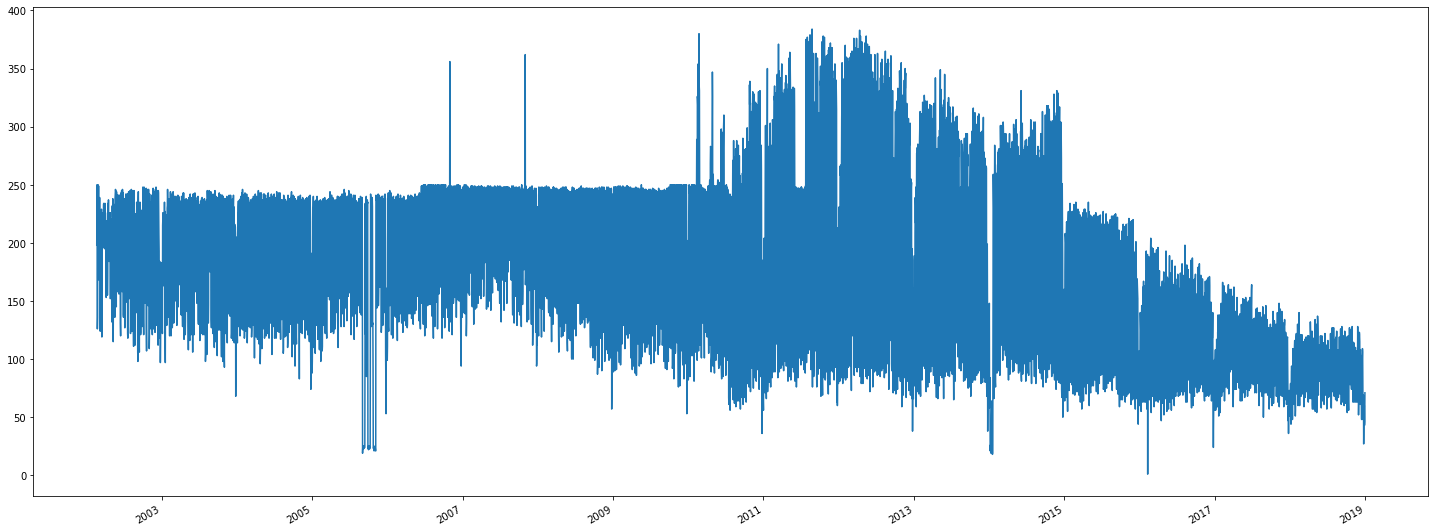

In [5]:
df['publish_date'].value_counts().sort_index().plot(figsize=(25,10))

<h1>Now lets have close look into the years</h1>

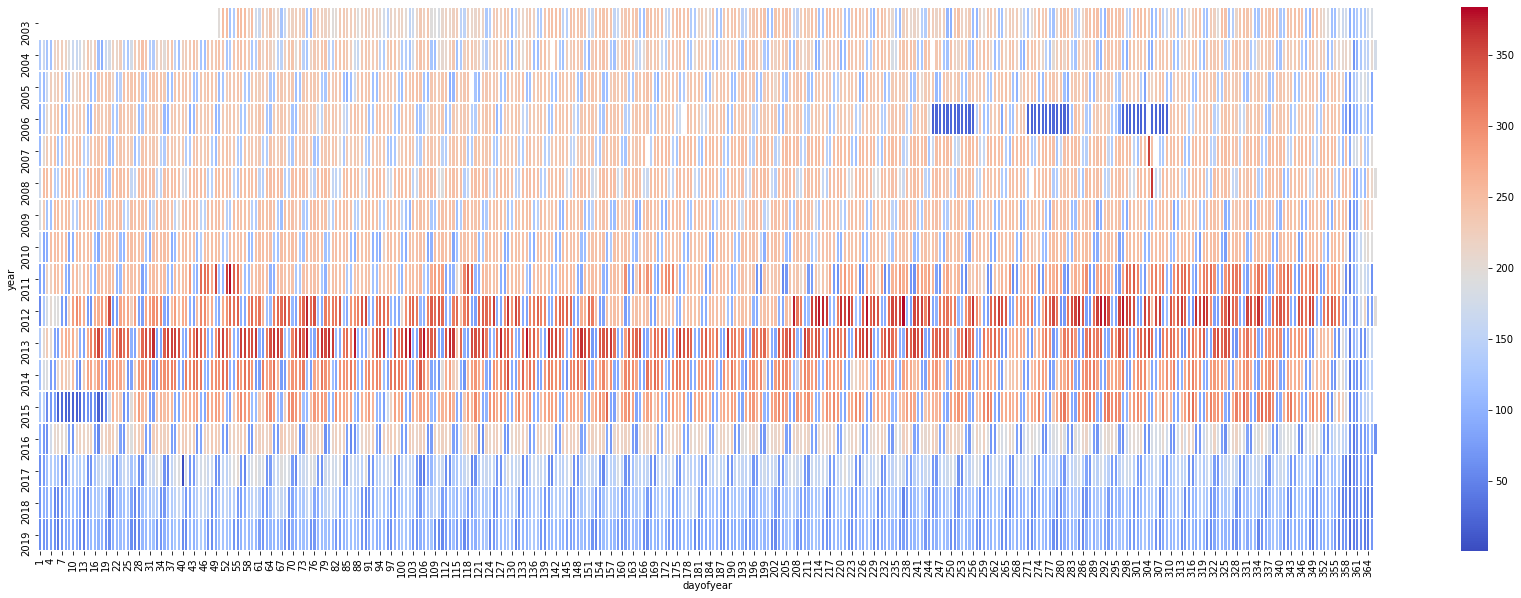

In [6]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.year", "dt.dayofyear", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>That's pretty dense so just use weeks instead of days</h1>

<ipython-input-2-4a91159db80e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  return operator.attrgetter(tmp_str)(tmp_df[col])


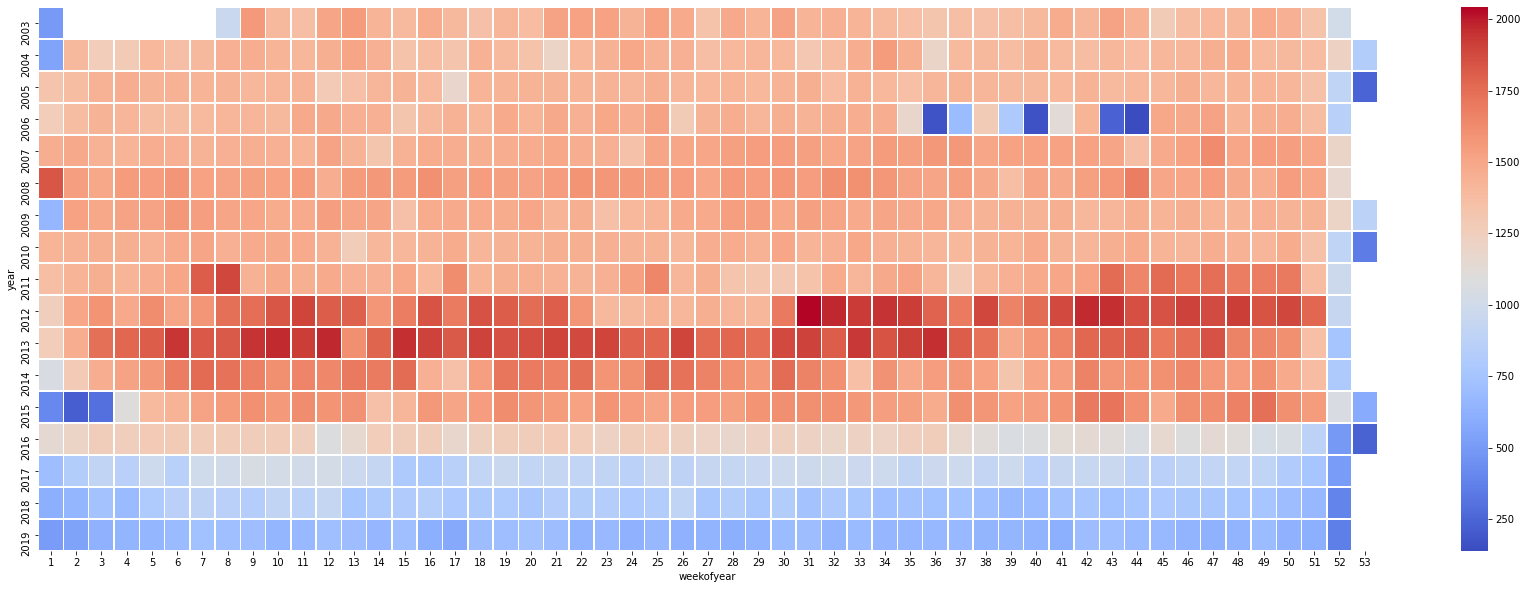

In [7]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.year", "dt.weekofyear", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>Or months</h1>

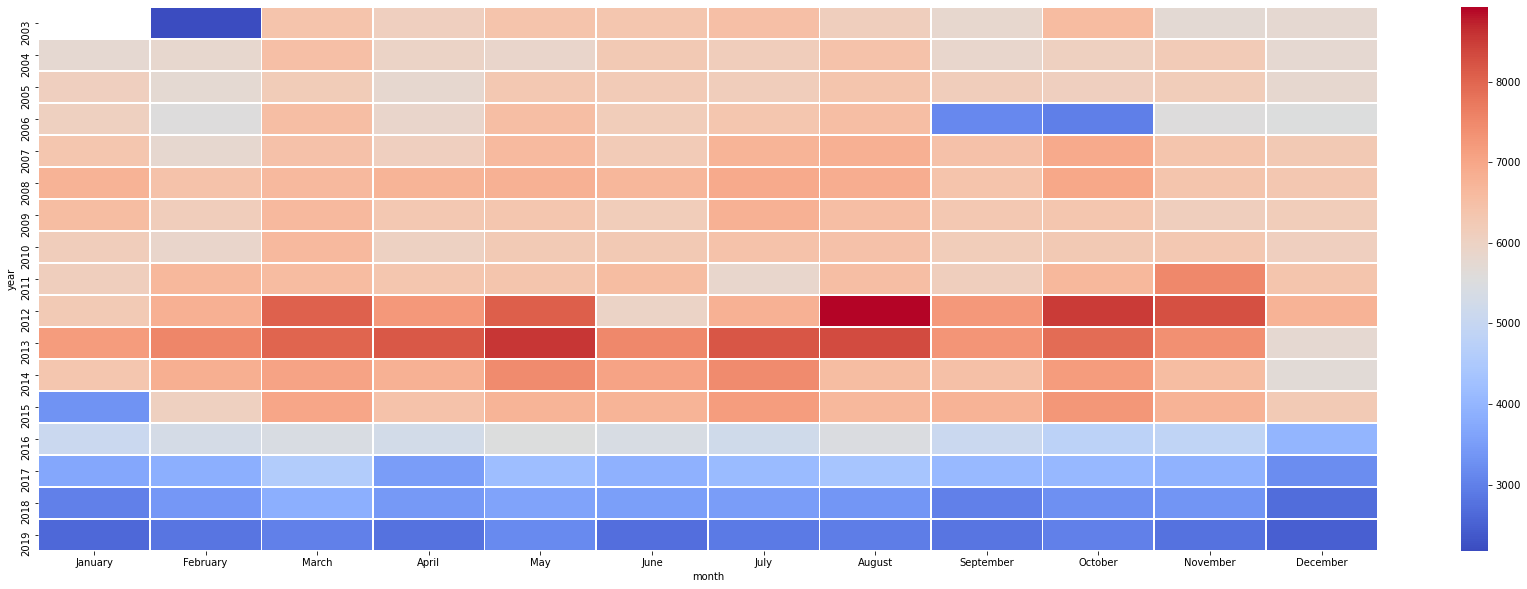

In [8]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.year", "dt.month", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>Or quarter years</h1>

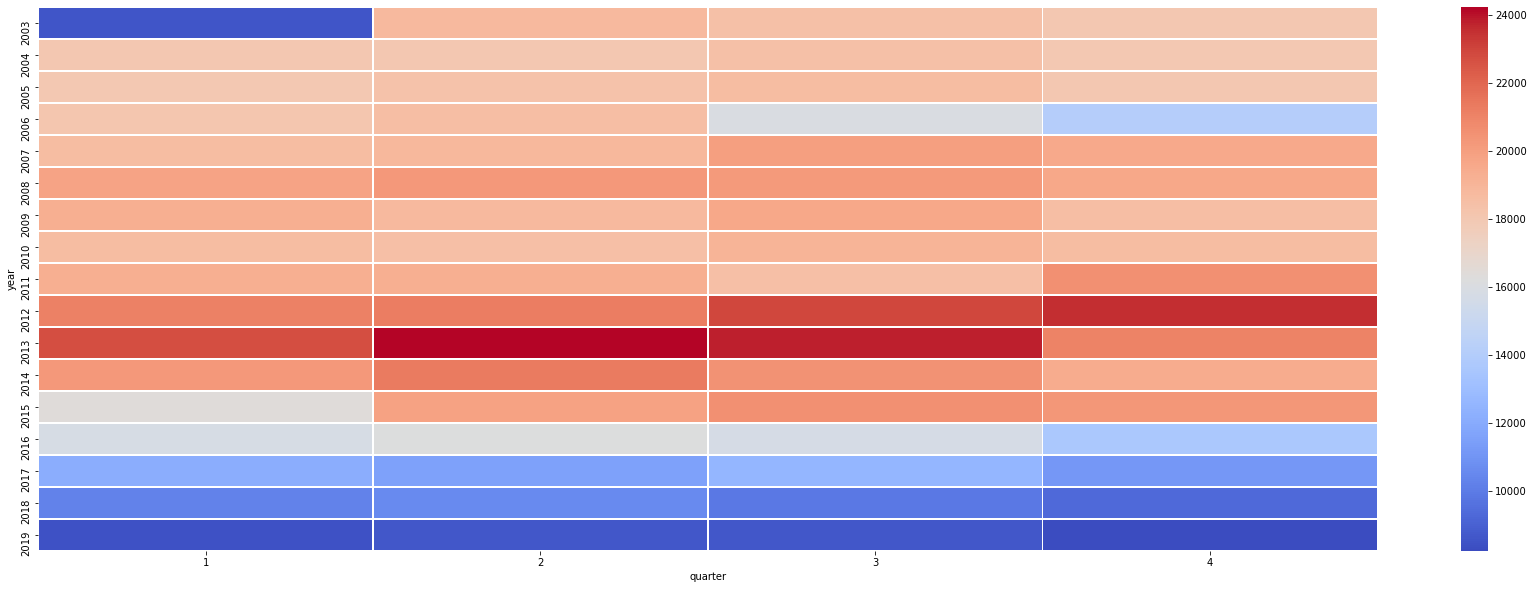

In [9]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.year", "dt.quarter", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>Now let's look at the mean of all years</h1>
<h3>Every year is basically compressed into one, and one can clearly see the structure of a year with the bluish february and christmas

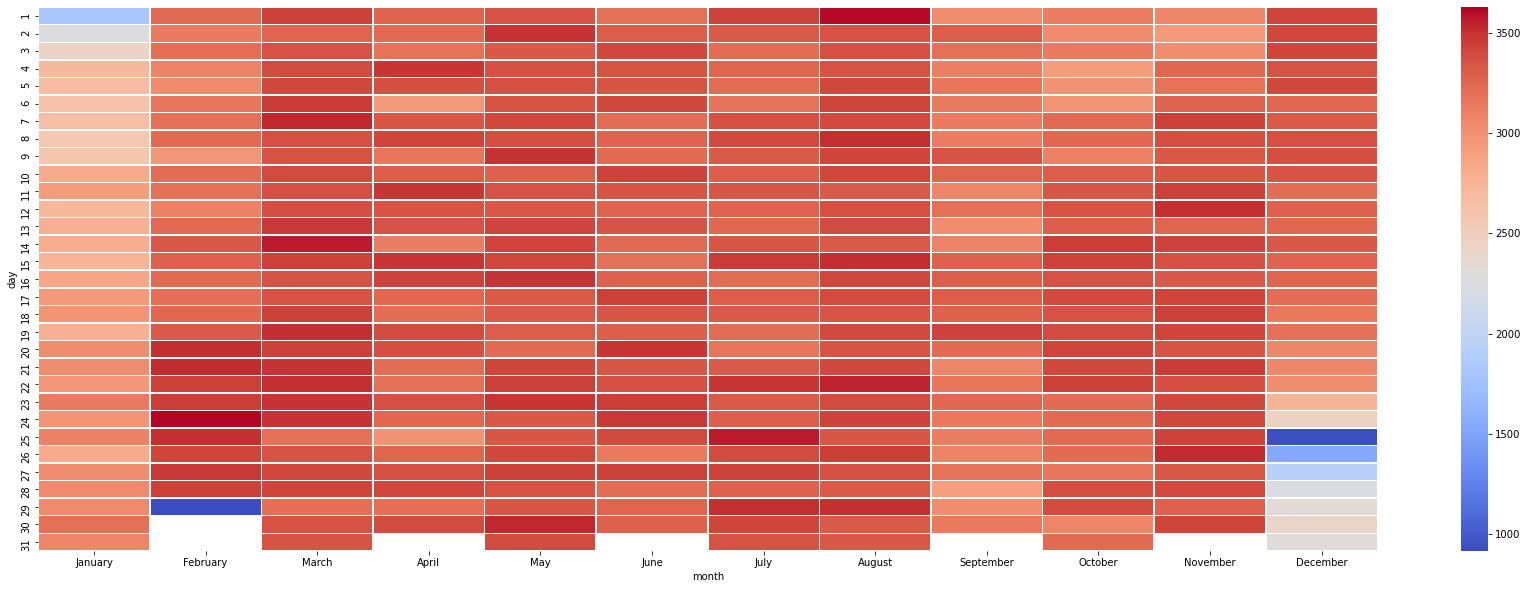

In [10]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.day", "dt.month", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>Now let's look at only a week per quarter of a year</h1>
<h3>Also here we can see what we would expect. Less news on weekend</h3>

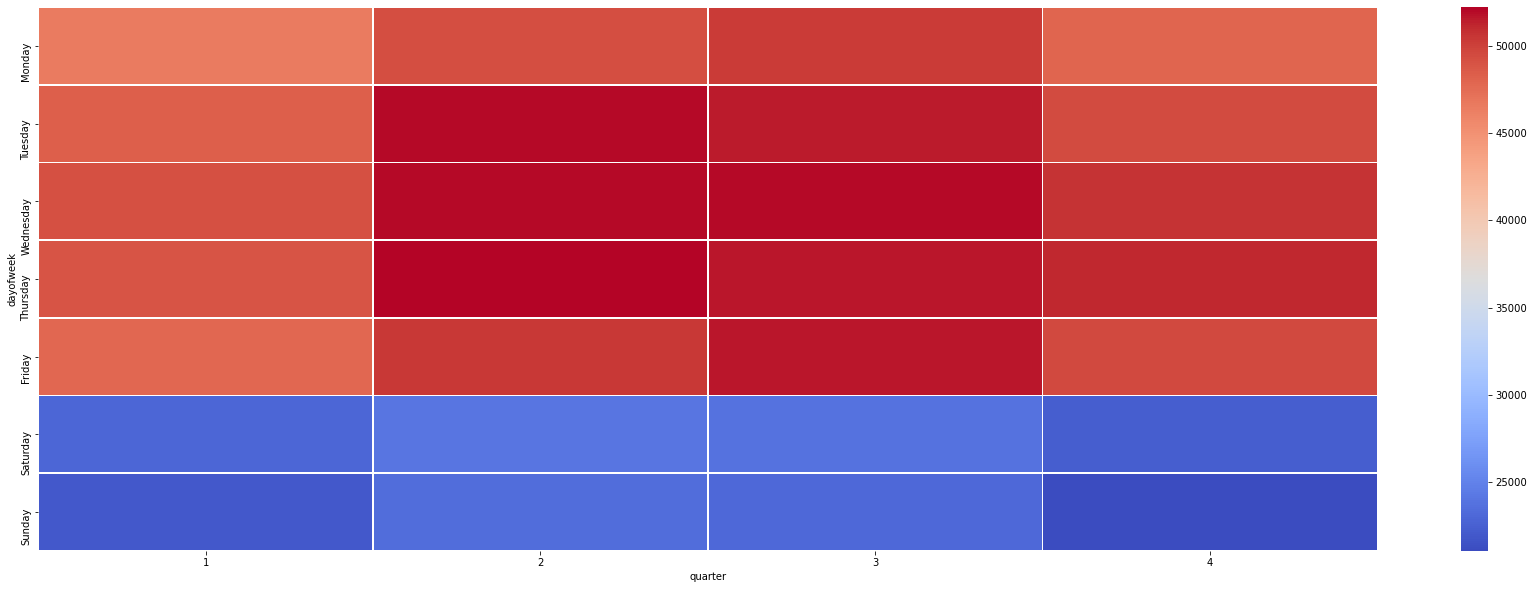

In [11]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.dayofweek", "dt.quarter", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>Obviously there is also some dumb shit</h1>
<h3>Like showing the the day of years and in which quarter they are</h3>

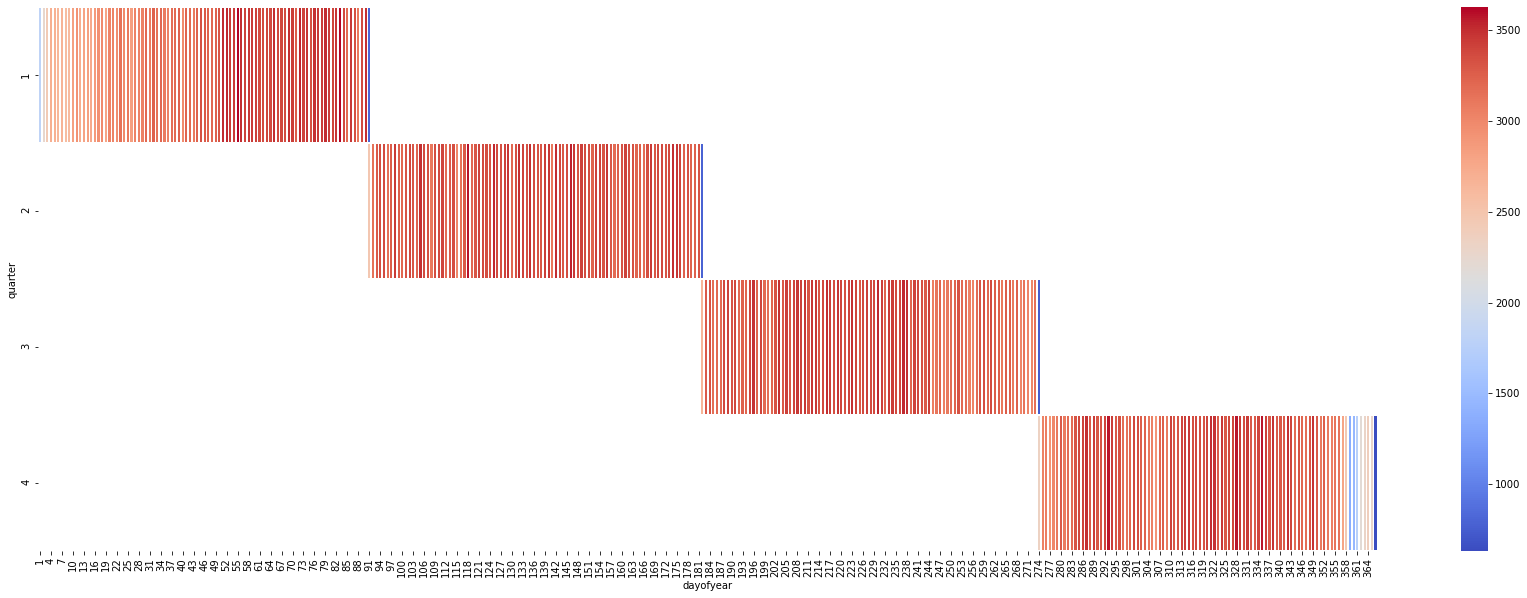

In [12]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.quarter", "dt.dayofyear", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>Or showing which week is in which month</h1>

<ipython-input-2-4a91159db80e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  return operator.attrgetter(tmp_str)(tmp_df[col])


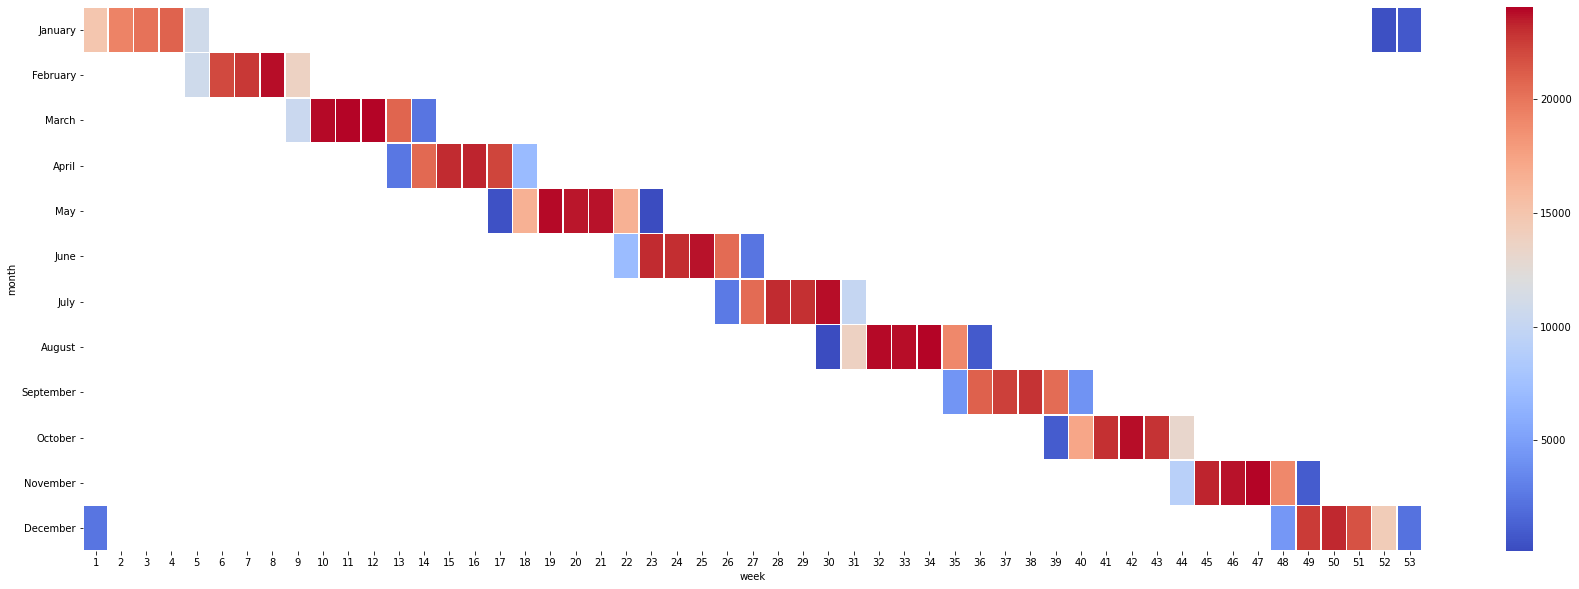

In [13]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.month", "dt.week", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>Or showing which day is in which week</h1>
<h3>You can also clearly see every weekend, where the colors are faded</h3>

<ipython-input-2-4a91159db80e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  return operator.attrgetter(tmp_str)(tmp_df[col])


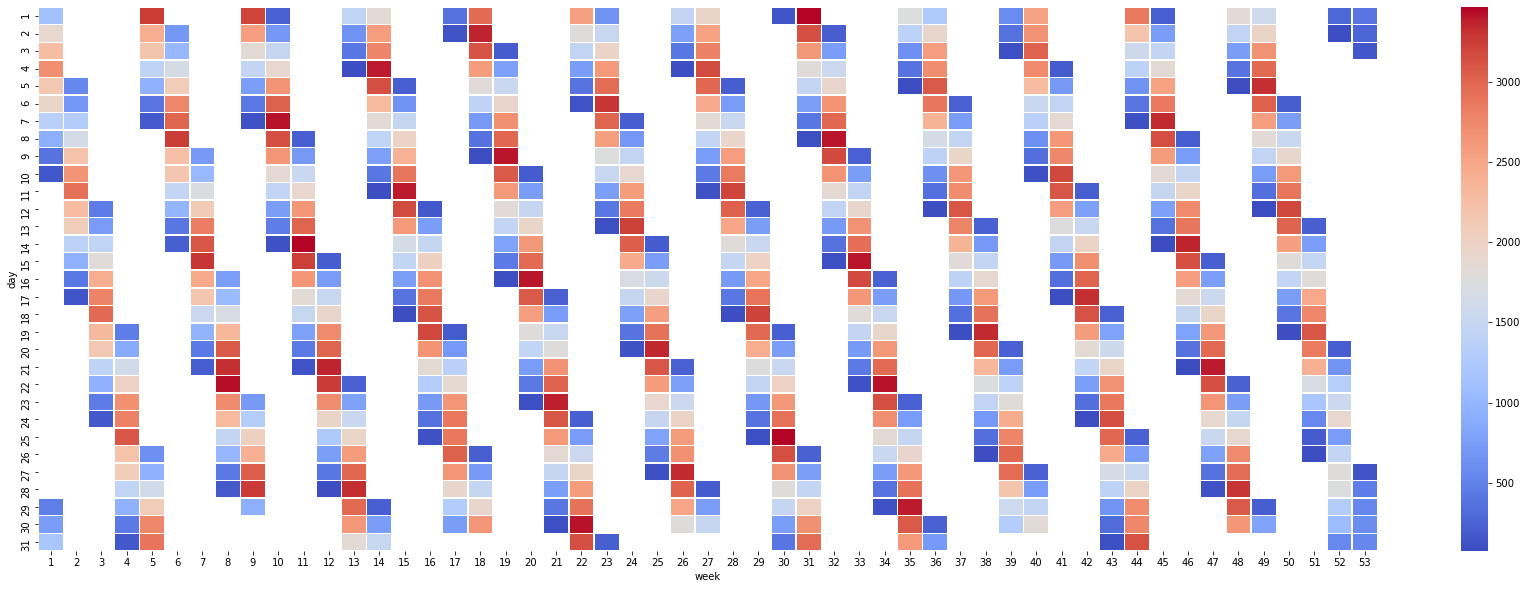

In [14]:
tmp_matrix = get_matrix(df, 'publish_date', "dt.day", "dt.week", fill=np.NaN)
heatmap(tmp_matrix, size=(30,10))

<h1>You could also do all operations with hour, minute, second, microsecond and nanosecond, but this very dataset only provides days.</h1><br>
<h3>For example you could get_matrix(df, 'publish_date', "dt.dayof week", "dt.hour") to see on which time of the day per week the publisher release most of their content.</h3>

<h3>Just try out all of these pandas datetime functions and their combinations. Maybe you will have a fun time, just like me.</h3>
<ul>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html">pandas.Series.dt.date</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.time.html">pandas.Series.dt.time</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.timetz.html">pandas.Series.dt.timetz</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html">pandas.Series.dt.year</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html">pandas.Series.dt.month</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day.html">pandas.Series.dt.day</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html">pandas.Series.dt.hour</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.minute.html">pandas.Series.dt.minute</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.second.html">pandas.Series.dt.second</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.microsecond.html">pandas.Series.dt.microsecond</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.nanosecond.html">pandas.Series.dt.nanosecond</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.week.html">pandas.Series.dt.week</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.weekofyear.html">pandas.Series.dt.weekofyear</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html">pandas.Series.dt.dayofweek</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.weekday.html">pandas.Series.dt.weekday</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofyear.html">pandas.Series.dt.dayofyear</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.quarter.html">pandas.Series.dt.quarter</a></li>
</ul>